In [1]:
import pandas as pd

# Load the dataset
file_path = "PS_20174392719_1491204439457_log.csv"
df = pd.read_csv(file_path)

# Display basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [2]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Data Preprocessing

In [3]:
# Check for missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
# Fill or drop missing values as needed
df = df.dropna()

## Creating a Dataframe

In [11]:
# Calculate the index that represents 1/8th of the data
quarter_index = len(df) // 8

# Create a new dataframe with the first 1/8th of the data
df_subset = df.iloc[:quarter_index]

# Display the first few rows of the new subset dataframe
df_subset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795327 entries, 0 to 795326
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            795327 non-null  int64  
 1   type            795327 non-null  object 
 2   amount          795327 non-null  float64
 3   nameOrig        795327 non-null  object 
 4   oldbalanceOrg   795327 non-null  float64
 5   newbalanceOrig  795327 non-null  float64
 6   nameDest        795327 non-null  object 
 7   oldbalanceDest  795327 non-null  float64
 8   newbalanceDest  795327 non-null  float64
 9   isFraud         795327 non-null  int64  
 10  isFlaggedFraud  795327 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 66.7+ MB


## Encoding Categorical Variables

In [13]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

# Encoding categorical columns (for example 'type' and 'nameOrig')
label_encoder = LabelEncoder()

df_subset['type'] = label_encoder.fit_transform(df_subset['type'])
df_subset['nameOrig'] = label_encoder.fit_transform(df_subset['nameOrig'])
df_subset['nameDest'] = label_encoder.fit_transform(df_subset['nameDest'])

## Normalization/Standardization

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Using MinMaxScaler for normalization
scaler = MinMaxScaler()
df_subset[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = scaler.fit_transform(
    df_subset[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])

## Addressing Class Imbalance (SMOTE)

In [17]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = df_subset.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df_subset['isFraud']

# Apply SMOTE for balancing the class distribution
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# EDA Analysis

In [18]:
# Show descriptive statistics for numerical features
df_subset.describe()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,795327.000000,795327.000000,795327.000000,795327.000000,795327.000000,795327.000000,795327.000000,795327.000000,795327.000000,795327.000000,795327.0
mean,20.723688,1.700659,0.016391,397591.181275,0.022580,0.023103,94106.639544,0.023726,0.027029,0.000578,0.0
std,10.231933,1.344349,0.026764,229547.908864,0.075887,0.076823,93069.426192,0.055849,0.058331,0.024043,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,13.000000,1.000000,0.001298,198796.500000,0.000000,0.000000,28122.000000,0.000000,0.000000,0.000000,0.0
50%,18.000000,1.000000,0.007974,397596.000000,0.000424,0.000000,56312.000000,0.003013,0.005327,0.000000,0.0
75%,33.000000,3.000000,0.022032,596382.500000,0.003815,0.004868,140918.500000,0.022065,0.028048,0.000000,0.0
max,40.000000,4.000000,1.000000,795175.000000,1.000000,1.000000,339738.000000,1.000000,1.000000,1.000000,0.0


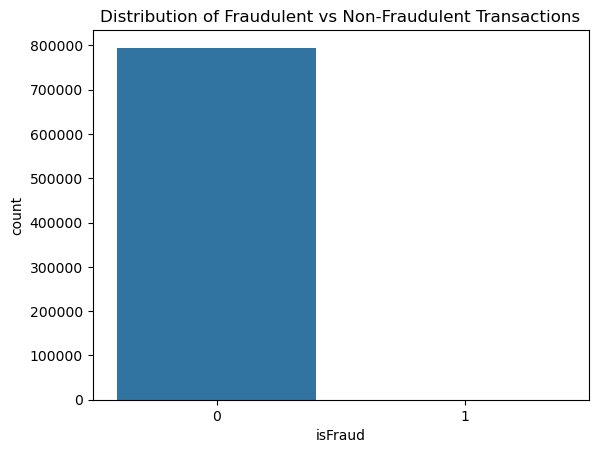

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable (isFraud)
sns.countplot(x='isFraud', data=df_subset)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

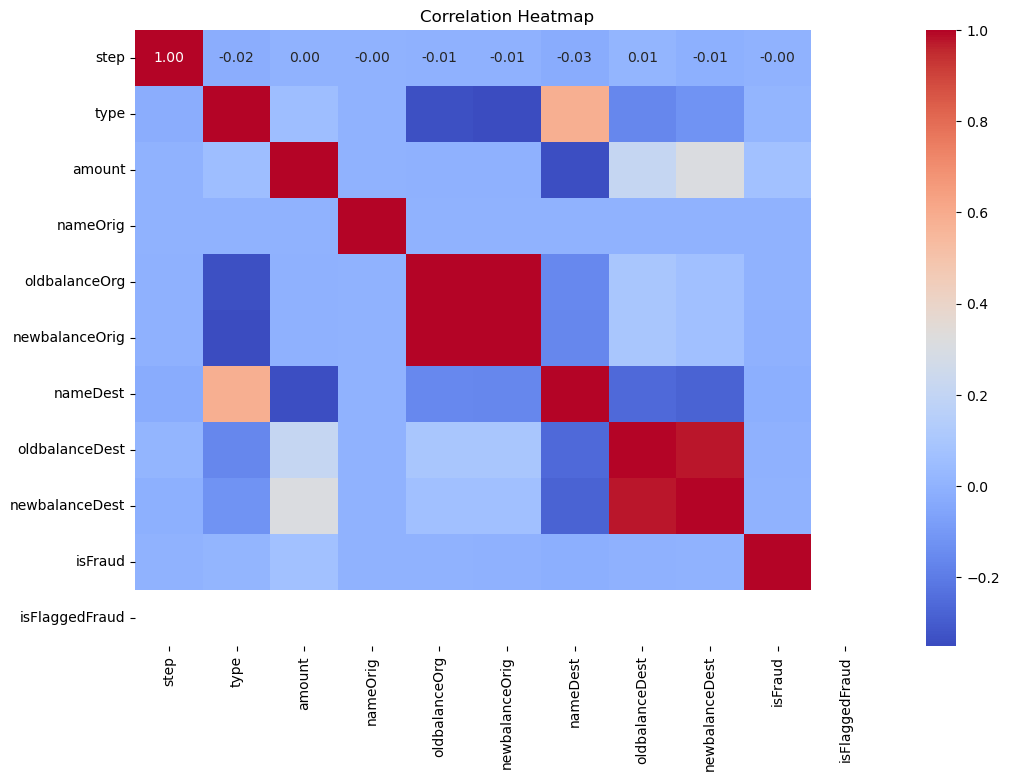

In [21]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_subset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

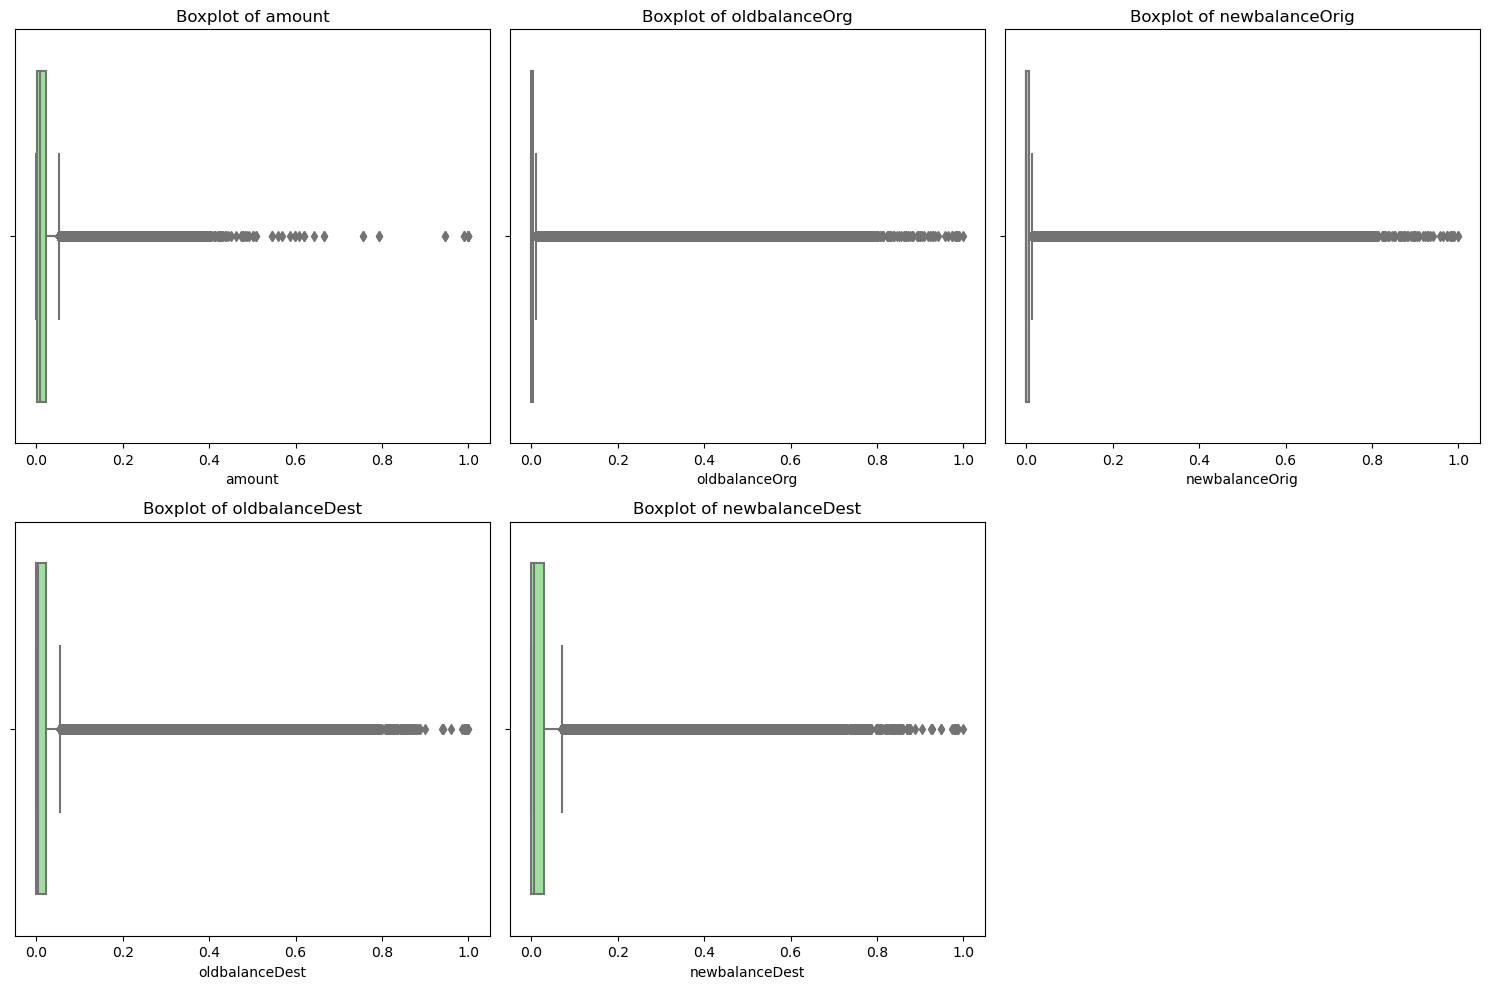

In [69]:
# Boxplot to check for outliers in numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_subset[feature], color='lightgreen')
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()

plt.show()

## PCA Clustering

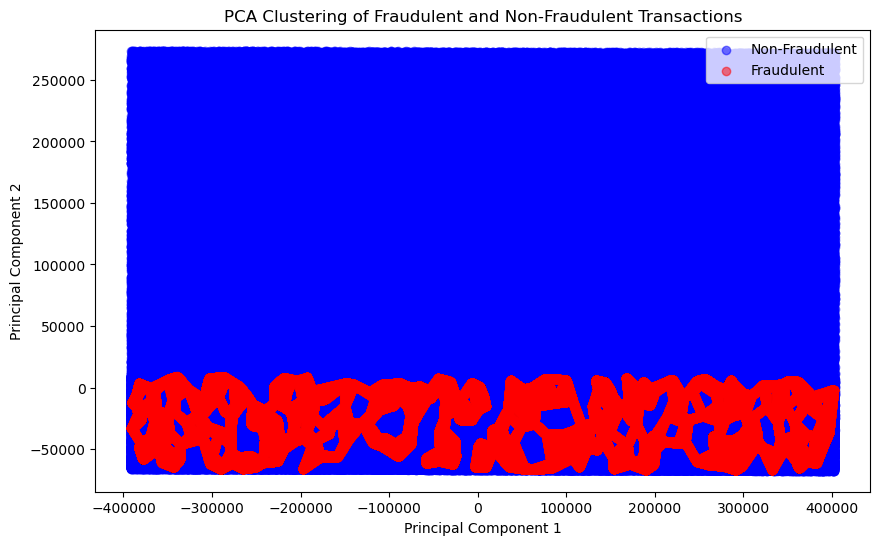

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_res)

# Plot the PCA clustering results
plt.figure(figsize=(10, 6))

# Scatter plot with different colors for fraudulent (1) and non-fraudulent (0) transactions
plt.scatter(X_pca[y_res == 0, 0], X_pca[y_res == 0, 1], label='Non-Fraudulent', color='blue', alpha=0.5)
plt.scatter(X_pca[y_res == 1, 0], X_pca[y_res == 1, 1], label='Fraudulent', color='red', alpha=0.5)

# Adding labels and title
plt.title('PCA Clustering of Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add legend
plt.legend()

# Show plot
plt.show()

# Model Selection and Evaluation

## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, random_state=42)

# Train the model
rf.fit(X_res, y_res)

RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)

In [60]:
# Predict and evaluate
y_pred_rf = rf.predict(X_res)
print('Random Forest Classification Report:')
print(classification_report(y_res, y_pred_rf))
print('Random Forest AUC:', roc_auc_score(y_res, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    794867
           1       0.98      0.98      0.98    794867

    accuracy                           0.98   1589734
   macro avg       0.98      0.98      0.98   1589734
weighted avg       0.98      0.98      0.98   1589734

Random Forest AUC: 0.979163180758542


## LightGBM

In [25]:
import lightgbm as lgb

# Initialize the model
lgbm = lgb.LGBMClassifier(n_estimators=100, random_state=42)

# Train the model
lgbm.fit(X_res, y_res)

[LightGBM] [Info] Number of positive: 794867, number of negative: 794867
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1831
[LightGBM] [Info] Number of data points in the train set: 1589734, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(random_state=42)

In [26]:
# Predict and evaluate
y_pred_lgbm = lgbm.predict(X_res)
print('LightGBM Classification Report:')
print(classification_report(y_res, y_pred_lgbm))
print('LightGBM AUC:', roc_auc_score(y_res, y_pred_lgbm))

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    794867
           1       0.99      1.00      0.99    794867

    accuracy                           0.99   1589734
   macro avg       0.99      0.99      0.99   1589734
weighted avg       0.99      0.99      0.99   1589734

LightGBM AUC: 0.9943380464907967


## Neural Networks (Keras)

In [32]:
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Build a simple neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_res.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

In [34]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [35]:
model.fit(X_res, y_res, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
39744/39744 [==============================] - 36s 879us/step - loss: 41.6941 - accuracy: 0.6026 - val_loss: 0.9884 - val_accuracy: 0.0000e+00
Epoch 2/15
39744/39744 [==============================] - 34s 863us/step - loss: 0.6623 - accuracy: 0.6250 - val_loss: 0.9755 - val_accuracy: 0.0000e+00
Epoch 3/15
39744/39744 [==============================] - 35s 874us/step - loss: 0.6616 - accuracy: 0.6250 - val_loss: 0.9863 - val_accuracy: 0.0000e+00
Epoch 4/15
39744/39744 [==============================] - 35s 869us/step - loss: 0.6617 - accuracy: 0.6250 - val_loss: 0.9854 - val_accuracy: 0.0000e+00
Epoch 5/15
39744/39744 [==============================] - 34s 863us/step - loss: 0.6616 - accuracy: 0.6250 - val_loss: 0.9838 - val_accuracy: 0.0000e+00
Epoch 6/15
39744/39744 [==============================] - 35s 875us/step - loss: 0.6618 - accuracy: 0.6250 - val_loss: 0.9762 - val_accuracy: 0.0000e+00
Epoch 7/15
39744/39744 [==============================] - 34s 868us/step - loss: 

In [36]:
# Evaluate the model
loss, accuracy = model.evaluate(X_res, y_res)
print(f'Neural Network Accuracy: {accuracy * 100:.2f}%')

49680/49680 [==============================] - 29s 590us/step - loss: 0.7260 - accuracy: 0.5000
Neural Network Accuracy: 50.00%


## DNN Model

In [37]:
# Build the Deep Neural Network (DNN)
dnn_model = Sequential()

# Input layer and first hidden layer
dnn_model.add(Dense(128, input_dim=X_res.shape[1], activation='relu'))

# Additional hidden layers
dnn_model.add(Dense(64, activation='relu'))
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dense(16, activation='relu'))

In [38]:
# Output layer (binary classification)
dnn_model.add(Dense(1, activation='sigmoid'))  # For binary classification (fraud or not)

In [39]:
# Compile the model
dnn_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [40]:
# Train the model
dnn_model.fit(X_res, y_res, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
39744/39744 [==============================] - 38s 950us/step - loss: 4.5300 - accuracy: 0.6152 - val_loss: 0.9788 - val_accuracy: 0.0000e+00
Epoch 2/10
39744/39744 [==============================] - 39s 978us/step - loss: 0.6618 - accuracy: 0.6250 - val_loss: 0.9570 - val_accuracy: 0.0000e+00
Epoch 3/10
39744/39744 [==============================] - 38s 968us/step - loss: 0.6617 - accuracy: 0.6250 - val_loss: 0.9940 - val_accuracy: 0.0000e+00
Epoch 4/10
39744/39744 [==============================] - 39s 970us/step - loss: 0.6617 - accuracy: 0.6250 - val_loss: 0.9668 - val_accuracy: 0.0000e+00
Epoch 5/10
39744/39744 [==============================] - 40s 997us/step - loss: 0.6616 - accuracy: 0.6250 - val_loss: 0.9498 - val_accuracy: 0.0000e+00
Epoch 6/10
39744/39744 [==============================] - 40s 1ms/step - loss: 0.6617 - accuracy: 0.6250 - val_loss: 0.9653 - val_accuracy: 0.0000e+00
Epoch 7/10
39744/39744 [==============================] - 39s 986us/step - loss: 0.6

In [41]:
# Evaluate the model
loss, accuracy = dnn_model.evaluate(X_res, y_res)
print(f'DNN Accuracy: {accuracy * 100:.2f}%')

49680/49680 [==============================] - 32s 643us/step - loss: 0.7263 - accuracy: 0.5000
DNN Accuracy: 50.00%


# Visualizations

Epoch 1/15
39744/39744 [==============================] - 36s 892us/step - loss: 0.6618 - accuracy: 0.6250 - val_loss: 0.9951 - val_accuracy: 0.0000e+00
Epoch 2/15
39744/39744 [==============================] - 35s 876us/step - loss: 0.6616 - accuracy: 0.6250 - val_loss: 0.9809 - val_accuracy: 0.0000e+00
Epoch 3/15
39744/39744 [==============================] - 35s 881us/step - loss: 0.6617 - accuracy: 0.6250 - val_loss: 0.9824 - val_accuracy: 0.0000e+00
Epoch 4/15
39744/39744 [==============================] - 35s 885us/step - loss: 0.6619 - accuracy: 0.6250 - val_loss: 0.9697 - val_accuracy: 0.0000e+00
Epoch 5/15
39744/39744 [==============================] - 35s 889us/step - loss: 0.6621 - accuracy: 0.6250 - val_loss: 0.9833 - val_accuracy: 0.0000e+00
Epoch 6/15
39744/39744 [==============================] - 36s 906us/step - loss: 0.6616 - accuracy: 0.6250 - val_loss: 0.9847 - val_accuracy: 0.0000e+00
Epoch 7/15
39744/39744 [==============================] - 35s 893us/step - loss: 0

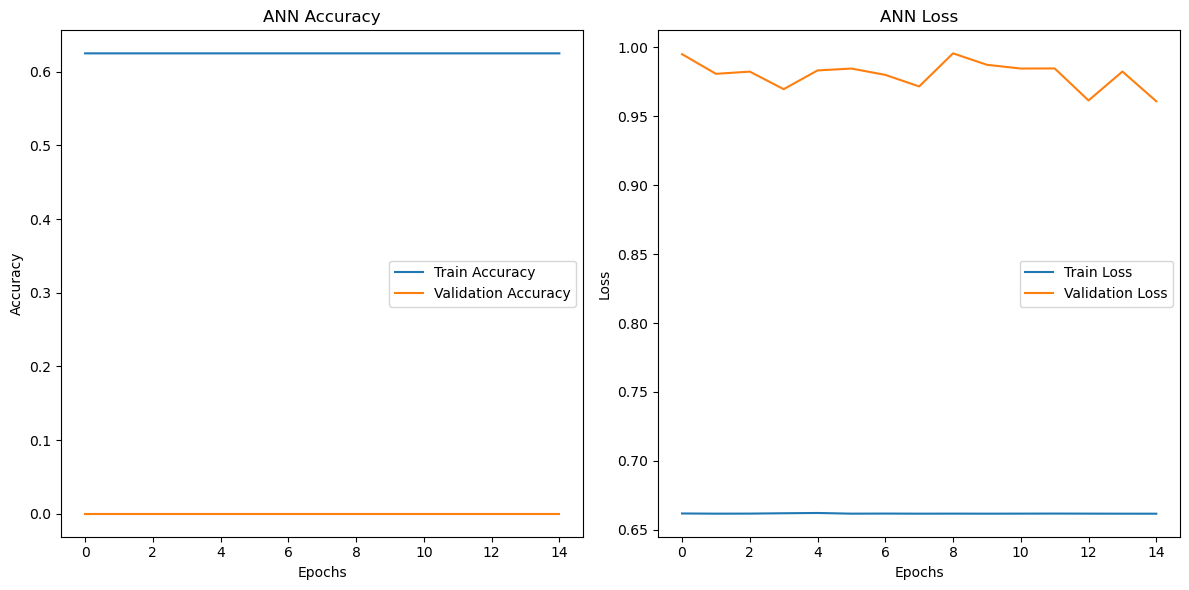

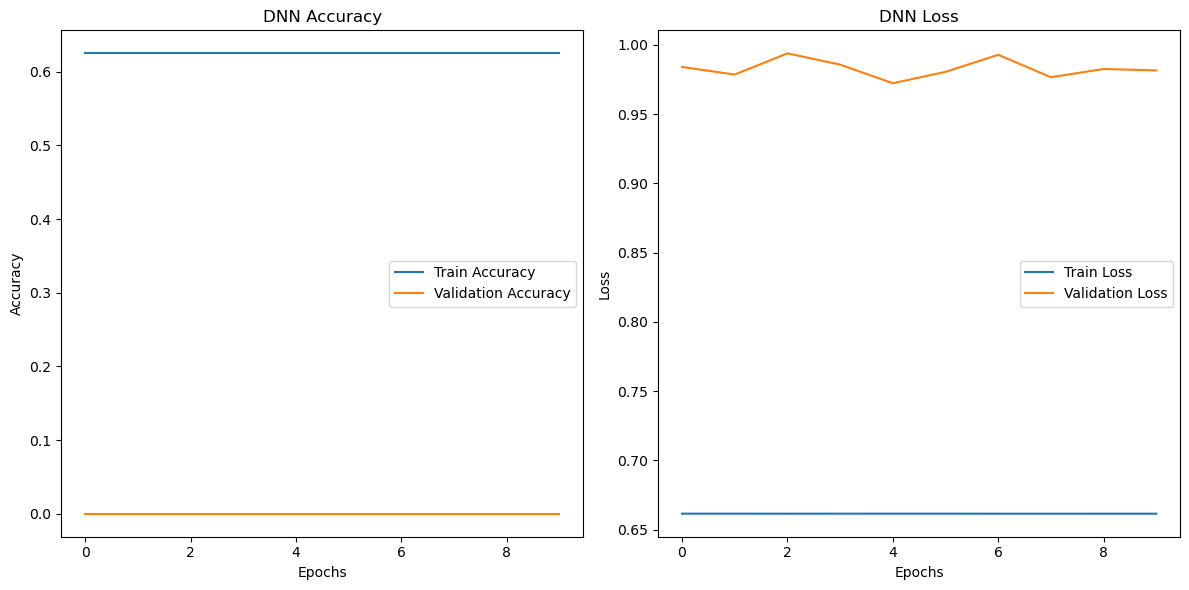

In [47]:
# Fit the model and save the history
ann_history = model.fit(X_res, y_res, epochs=15, batch_size=32, validation_split=0.2)
# Fit the DNN model and save the history
dnn_history = dnn_model.fit(X_res, y_res, epochs=10, batch_size=32, validation_split=0.2)

# Function to plot the training history
def plot_training_history(history, model_name):
    history_keys = history.history.keys()
    
    # Check for the correct keys for accuracy and loss
    acc_key = 'accuracy' if 'accuracy' in history_keys else None
    val_acc_key = 'val_accuracy' if 'val_accuracy' in history_keys else None
    loss_key = 'loss' if 'loss' in history_keys else None
    val_loss_key = 'val_loss' if 'val_loss' in history_keys else None

    # Plot the training and validation accuracy and loss if available
    plt.figure(figsize=(12, 6))

    # Plot training and validation accuracy if available
    if acc_key:
        plt.subplot(1, 2, 1)
        plt.plot(history.history[acc_key], label='Train Accuracy')
        if val_acc_key:
            plt.plot(history.history[val_acc_key], label='Validation Accuracy')
        plt.title(f'{model_name} Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

    # Plot training and validation loss if available
    if loss_key:
        plt.subplot(1, 2, 2)
        plt.plot(history.history[loss_key], label='Train Loss')
        if val_loss_key:
            plt.plot(history.history[val_loss_key], label='Validation Loss')
        plt.title(f'{model_name} Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Plot for ANN
plot_training_history(ann_history, 'ANN')

# Plot for DNN
plot_training_history(dnn_history, 'DNN')

## Confusion Matrix

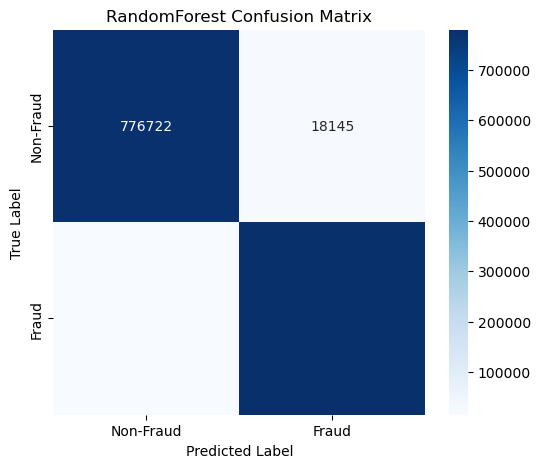

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix for RandomForest
cm_rf = confusion_matrix(y_res, y_pred_rf)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])

# Adding labels and title
plt.title('RandomForest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show plot
plt.show()

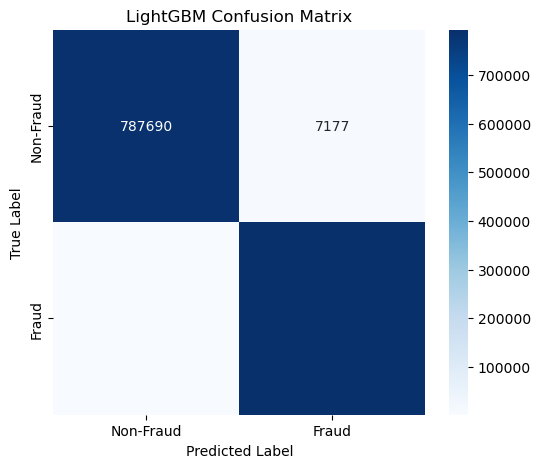

In [70]:
# Confusion Matrix for LightGBM
cm_lgbm = confusion_matrix(y_res, y_pred_lgbm)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])

# Adding labels and title
plt.title('LightGBM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show plot
plt.show()

## Comparison Between Models

In [51]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [63]:
# Predict probabilities for RandomForest, LightGBM, ANN, and DNN
fpr_rf, tpr_rf, _ = roc_curve(y_res, rf.predict_proba(X_res)[:, 1])
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_res, lgbm.predict_proba(X_res)[:, 1])

In [64]:
# For ANN, predict probabilities using the `predict` method
fpr_ann, tpr_ann, _ = roc_curve(y_res, model.predict(X_res)[:, 0])

# For DNN, predict probabilities using the `predict` method
fpr_dnn, tpr_dnn, _ = roc_curve(y_res, dnn_model.predict(X_res)[:, 0])

49680/49680 [==============================] - 31s 624us/step


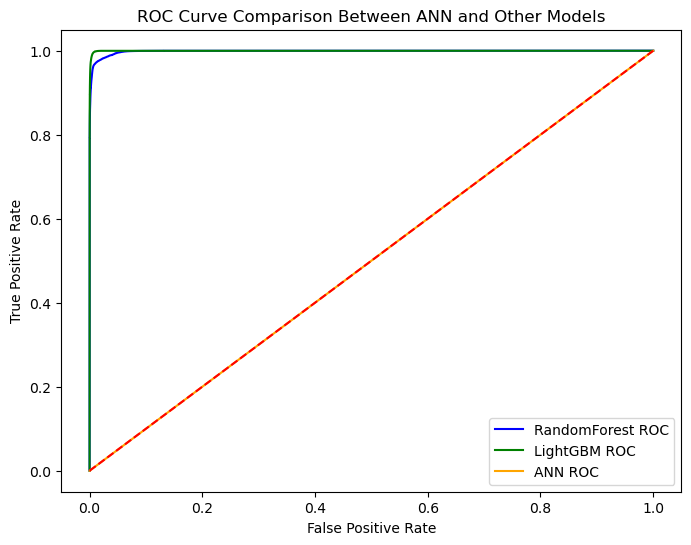

In [65]:
# Plot the ROC curves for all models
plt.figure(figsize=(8, 6))

plt.plot(fpr_rf, tpr_rf, color='blue', label='RandomForest ROC')
plt.plot(fpr_lgbm, tpr_lgbm, color='green', label='LightGBM ROC')
plt.plot(fpr_ann, tpr_ann, color='orange', label='ANN ROC')

# Diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Set title and labels
plt.title('ROC Curve Comparison Between ANN and Other Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Add legend
plt.legend()

# Show plot
plt.show()

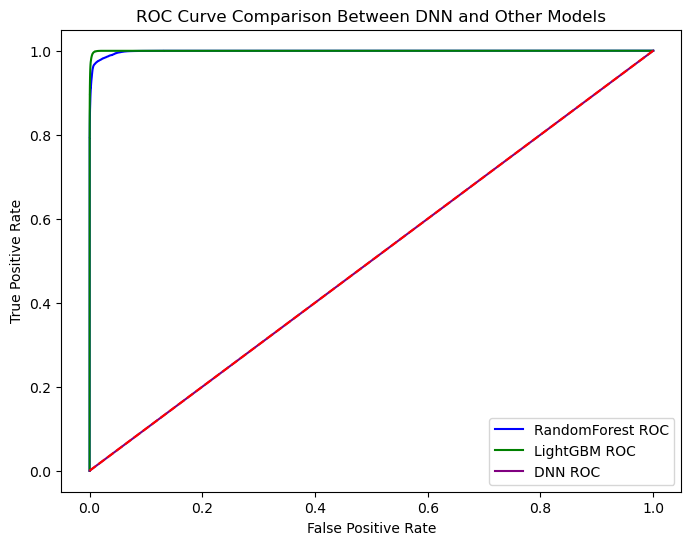

In [66]:
# Plot the ROC curves for all models
plt.figure(figsize=(8, 6))

plt.plot(fpr_rf, tpr_rf, color='blue', label='RandomForest ROC')
plt.plot(fpr_lgbm, tpr_lgbm, color='green', label='LightGBM ROC')
plt.plot(fpr_dnn, tpr_dnn, color='purple', label='DNN ROC')

# Diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Set title and labels
plt.title('ROC Curve Comparison Between DNN and Other Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Add legend
plt.legend()

# Show plot
plt.show()